In [1]:
from torchvision.datasets import MNIST
import matplotlib.pyplot as plt
import numpy as np

In [2]:
mnist_dataset_train = MNIST('train', True, download=True)
mnist_dataset_test = MNIST('test', False, download=True)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|███████████████████████████████████████████████████████████████████| 9912422/9912422 [00:03<00:00, 2605047.98it/s]


Extracting train\MNIST\raw\train-images-idx3-ubyte.gz to train\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|████████████████████████████████████████████████████████████████████████| 28881/28881 [00:00<00:00, 233874.36it/s]


Extracting train\MNIST\raw\train-labels-idx1-ubyte.gz to train\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|███████████████████████████████████████████████████████████████████| 1648877/1648877 [00:01<00:00, 1473771.61it/s]


Extracting train\MNIST\raw\t10k-images-idx3-ubyte.gz to train\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|█████████████████████████████████████████████████████████████████████████| 4542/4542 [00:00<00:00, 2269811.60it/s]


Extracting train\MNIST\raw\t10k-labels-idx1-ubyte.gz to train\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|███████████████████████████████████████████████████████████████████| 9912422/9912422 [00:03<00:00, 2744948.64it/s]


Extracting test\MNIST\raw\train-images-idx3-ubyte.gz to test\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|████████████████████████████████████████████████████████████████████████| 28881/28881 [00:00<00:00, 267410.66it/s]


Extracting test\MNIST\raw\train-labels-idx1-ubyte.gz to test\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|███████████████████████████████████████████████████████████████████| 1648877/1648877 [00:01<00:00, 1469388.16it/s]


Extracting test\MNIST\raw\t10k-images-idx3-ubyte.gz to test\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|█████████████████████████████████████████████████████████████████████████| 4542/4542 [00:00<00:00, 1149283.83it/s]

Extracting test\MNIST\raw\t10k-labels-idx1-ubyte.gz to test\MNIST\raw



In [3]:
 len(mnist_dataset_train), len(mnist_dataset_test)

(60000, 10000)

In [4]:
mnist_dataset_train[0]

(<PIL.Image.Image image mode=L size=28x28>, 5)

C:\Users\matve\AppData\Local\Temp\ipykernel_21400\3058727472.py:9: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


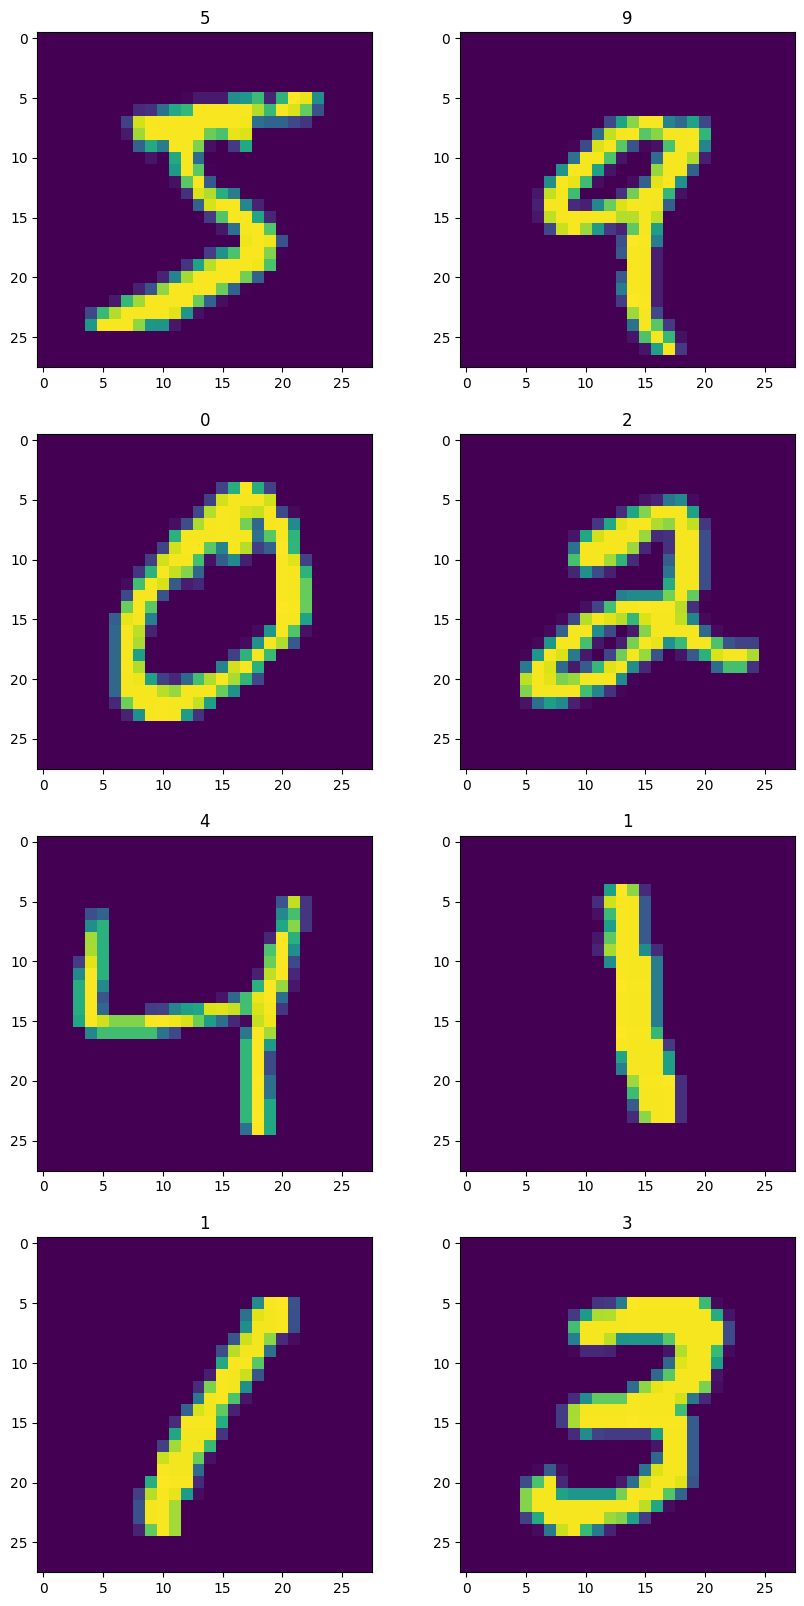

In [5]:
fig, axs = plt.subplots(4, 2, figsize=(10, 20))

for idx, (x, y) in enumerate(mnist_dataset_train):
    ax = axs[idx % 4][idx // 4]
    ax.imshow(x)
    ax.set_title(y)
    if idx == 7:
      break
fig.show()

In [6]:
np.array(mnist_dataset_train[0][0]).reshape(784).shape

(784,)

In [7]:
np.array([el[1] for el in mnist_dataset_train])

array([5, 0, 4, ..., 5, 6, 8])

In [8]:
X_train = np.array([np.array(el[0]).flatten() for el in mnist_dataset_train])
y_train = np.array([el[1] for el in mnist_dataset_train])
X_test = np.array([np.array(el[0]).flatten() for el in mnist_dataset_test])
y_test = np.array([el[1] for el in mnist_dataset_test])

In [9]:
print(X_train.shape)
print(y_train.shape)

(60000, 784)
(60000,)


In [10]:
from sklearn.linear_model import LogisticRegression

In [11]:
model = LogisticRegression(max_iter=10000)
model.fit(X_train[:2000], y_train[:2000])

LogisticRegression(max_iter=10000)

In [12]:
y_pred_test = model.predict(X_test)
y_pred_train = model.predict(X_train)

In [13]:
accuracy_train = np.sum(y_train == y_pred_train)/len(y_train)
accuracy_test = np.sum(y_test == y_pred_test)/len(y_test)

print(f'{accuracy_train=}, {accuracy_test=}')

accuracy_train=0.8588833333333333, accuracy_test=0.8597


In [14]:
import torch
from torch import nn
from torch.nn import CrossEntropyLoss
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader
from torch.optim import Adam
from torch.optim import AdamW

from tqdm import tqdm

from IPython.display import clear_output

In [15]:
mnist_dataset_train = MNIST('train', True, download=True, transform=ToTensor())
mnist_dataset_test = MNIST('test', False, download=True, transform=ToTensor())

In [16]:
type(mnist_dataset_test[0][0]), type(mnist_dataset_test[0][1]), mnist_dataset_test[0][0].shape

(torch.Tensor, int, torch.Size([1, 28, 28]))

In [17]:
batch_size = 32
train_dataloader = DataLoader(mnist_dataset_train, batch_size=batch_size, shuffle=True)
test_dataloader = DataLoader(mnist_dataset_test, batch_size=batch_size, shuffle=False)

In [18]:
for el in train_dataloader:
    print(len(el), el[0].shape, el[1])
    break

2 torch.Size([32, 1, 28, 28]) tensor([2, 7, 6, 4, 2, 6, 0, 5, 0, 2, 6, 3, 0, 6, 6, 1, 8, 0, 3, 4, 1, 8, 5, 7,
        3, 7, 7, 3, 4, 9, 8, 4])


In [19]:
el[0].max()

tensor(1.)

In [20]:
class Mnist(nn.Module):
    def __init__(self):
        super().__init__()
        self.lin1 = nn.Linear(784, 100)
        self.lin2 = nn.Linear(100, 100)
        self.lin3 = nn.Linear(100, 10)
        self.drOut = nn.Dropout(0.2)
        self.bn = nn.BatchNorm1d(100)
        self.act = nn.ReLU()
    def forward(self, x):
        x = x.view(-1, 784)
        #x = self.drOut(x)
        x = self.lin1(x)
        #x = self.bn(x)
        x = self.act(x)
        #x = self.drOut(x)
        x = self.lin2(x)
        #x = self.bn(x)
        x = self.act(x)
        x = self.drOut(x)
        x = self.lin3(x)

        return x

In [224]:
class Mnist(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 32, 3)
        self.conv2 = nn.Conv2d(32, 32, 3)
        # self.conv3 = nn.Conv2d(8, 8, 2)
        # self.conv4 = nn.Conv2d(8, 16, 2)
        #self.conv3 = nn.Conv2d(8, 16, 3)
        self.bn1 = nn.BatchNorm2d(32)
        self.bn2 = nn.BatchNorm2d(32)
        # self.bn3 = nn.BatchNorm2d(8)
        # self.bn4 = nn.BatchNorm2d(16)
        self.maxP = nn.MaxPool2d(2)
        self.drOut = nn.Dropout(0.1)
        self.lin1 = nn.Linear(32*5*5, 10)
        self.act = nn.ReLU()
    def forward(self, x):
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.maxP(x)
        x = self.act(x)
        x = self.conv2(x)
        x = self.bn2(x)
        x = self.maxP(x)
        x = self.act(x)
        # x = self.conv3(x)
        # x = self.bn3(x)
        # x = self.conv4(x)
        #x = self.bn4(x)
        #x = self.maxP(x)
        #x = self.act(x)
        #print(x.shape)
        #x=self.act(x)
        x = x.view(-1, 32*5*5)
        x = self.drOut(x)
        x = self.lin1(x)
        return x

In [225]:
model = Mnist().to(device)
x = torch.zeros(1, 1, 28, 28).to(device)
y = model(x)
y.shape

torch.Size([1, 10])

In [226]:
#model = Mnist()
#criterion = CrossEntropyLoss()
#optimizer = AdamW(model.parameters(), weight_decay=1e-1)

In [227]:
device = torch.device('cuda:0') if torch.cuda.is_available() else torch.device('cpu')

In [228]:
device

device(type='cuda', index=0)

In [229]:
def train(model, criterion, optimizer, dataloader, max_num_batches=1000):
  total_loss = 0
  total_accuracy = 0
  model.train()
  for idx, batch in tqdm(enumerate(dataloader)):
      optimizer.zero_grad()
      x, y = batch[0].to(device), batch[1]
      pred = model(x).to(device)
      loss = criterion(pred.cpu(), y)
      loss.backward()
      optimizer.step()
      total_loss += loss.item()
      total_accuracy += np.sum(np.argmax(pred.cpu().detach().numpy(), axis=1) == y.detach().numpy()) / len(batch[0])
      if idx == max_num_batches:
          break
  return total_loss / max_num_batches, total_accuracy / max_num_batches


In [230]:
def test(model, criterion, optimizer, dataloader):
  total_loss = 0
  total_accuracy = 0
  model.eval()
  with torch.no_grad():
      for idx, batch in tqdm(enumerate(dataloader)):
          x, y = batch[0].to(device), batch[1]
          with torch.no_grad():
              pred = model(x).to(device)
          loss = criterion(pred.cpu(), y)
          total_loss += loss.item()
          total_accuracy += np.sum(np.argmax(pred.cpu().detach().numpy(), axis=1) == y.detach().numpy()) / len(batch[0])
  return total_loss / len(dataloader), total_accuracy / len(dataloader)

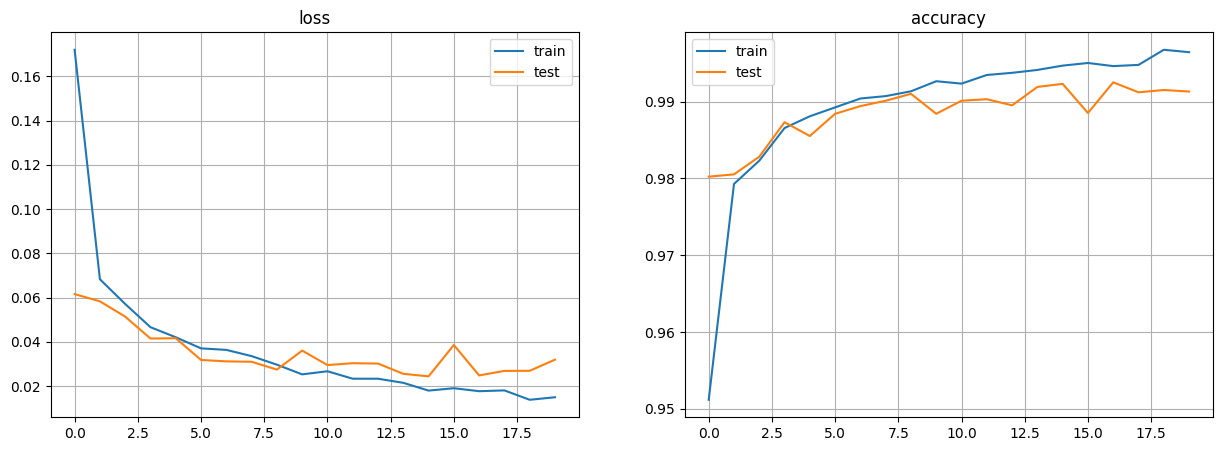

In [231]:
model = Mnist().to(device)
criterion = CrossEntropyLoss()
optimizer = Adam(model.parameters())

total_train_loss = []
total_test_loss = []
total_train_accuracy = []
total_test_accuracy = []

for epoch in range(20):
    train_loss, train_accuracy = train(model, criterion, optimizer, train_dataloader)
    test_loss, test_accuracy = test(model, criterion, optimizer, test_dataloader)

    total_train_loss.append(train_loss)
    total_test_loss.append(test_loss)
    total_train_accuracy.append(train_accuracy)
    total_test_accuracy.append(test_accuracy)

    print(epoch)
    clear_output(True)
    fig, axs = plt.subplots(1, 2, figsize=(15, 5))

    axs[0].plot(total_train_loss, label='train')
    axs[0].plot(total_test_loss, label='test')
    axs[0].set_title('loss')
    axs[0].grid()
    axs[0].legend(loc='best')


    axs[1].plot(total_train_accuracy, label='train')
    axs[1].plot(total_test_accuracy, label='test')
    axs[1].set_title('accuracy')
    axs[1].grid()
    axs[1].legend(loc='best')

    plt.show()

In [234]:
print(f"Кол-во параметров: {sum(p.numel() for p in model.parameters())}.")

Кол-во параметров: 17706.


In [233]:
total_test_accuracy

[0.9802316293929713,
 0.9805311501597445,
 0.9828274760383386,
 0.9873202875399361,
 0.9855231629392971,
 0.9884185303514377,
 0.9894169329073482,
 0.9901158146964856,
 0.9910143769968051,
 0.9884185303514377,
 0.9901158146964856,
 0.9903154952076677,
 0.9895167731629393,
 0.9919129392971247,
 0.9923123003194888,
 0.9885183706070287,
 0.9925119808306709,
 0.9912140575079872,
 0.9915135782747604,
 0.9913138977635783]